# 1. Levenshtein distance
![레벤슈타인](./images/levenshtein.png)

In [1]:
## 필요한 패키지 불러오는 부분
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [2]:
## 단어에서 알파벳, 한국어, 숫자, 띄어쓰기만 남기도록 해주는 함수
preprocessing = lambda word: re.sub('[^a-z0-9가-힣 ]', '', word.lower())

def levenshtein(word1, word2):
    word1, word2 = preprocessing(word1), preprocessing(word2)
    
    ## Levenshtien 거리의 테이블 생성 
    ## 왼쪽 위는 빈칸으로 비워두므로 단어들의 길이 + 1로 생성
    distance_table = np.zeros((len(word1) + 1, len(word2) + 1))
    
    ## 데이터 프레임으로 생성하기 위해
    indexes = [''] + [alpha for alpha in word1]
    columns = [''] + [alpha for alpha in word2]
    
    ## 왼쪽 위의 빈칸의 편집거리를 계산하는 부분
    for idx in range(distance_table.shape[0]): distance_table[idx][0] = idx
    for idx in range(distance_table.shape[1]): distance_table[0][idx] = idx
    
    for odx in range(1, distance_table.shape[0]):
        word1_alpha = word1[odx - 1]
        
        for idx in range(1, distance_table.shape[1]):
            cost = 1 if word1[odx - 1] != word2[idx - 1] else 0
            
            add = distance_table[odx - 1][idx] + 1
            sub = distance_table[odx][idx-1] + 1
            mod = distance_table[odx-1][idx-1] + cost
            
            distance_table[odx][idx] = np.min([add, sub, mod])
        
    distance_table = pd.DataFrame(distance_table, index = indexes, columns = columns)
    return distance_table

In [3]:
dist_table = levenshtein('calcification', 'micro calcification')
dist_table.iloc[-1, -1]

6.0

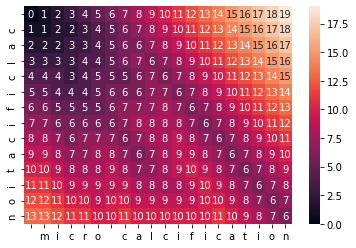

In [4]:
sns.heatmap(dist_table, annot = True)
plt.show()